In [1]:
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np

In [2]:
wine=load_wine()
print(wine)

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
 

In [3]:
df_wine=pd.DataFrame(data=np.c_[wine['data'],wine['target']],columns=wine['feature_names']+['target'])
df_wine.tail()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740.0,2.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750.0,2.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835.0,2.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840.0,2.0
177,14.13,4.10,2.74,24.5,96.0,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560.0,2.0


In [4]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df_wine.drop('target',axis=1),df_wine['target'],test_size=0.3,random_state=None,shuffle=True)
X_train.head()
y_train.head()

26     0.0
108    1.0
61     1.0
37     0.0
134    2.0
Name: target, dtype: float64

In [5]:
from sklearn.preprocessing import StandardScaler
modelscaler=StandardScaler()
X_train1=modelscaler.fit_transform(X_train)
X_test1=modelscaler.fit_transform(X_test)

In [6]:
from sklearn.linear_model import LogisticRegression
model1=LogisticRegression(multi_class='multinomial', solver='lbfgs')
model1.fit(X_train1,y_train)


LogisticRegression(multi_class='multinomial')

In [7]:
results=model1.predict(X_test1)
print(results)

[1. 2. 1. 1. 1. 2. 1. 2. 1. 0. 2. 2. 2. 2. 0. 0. 1. 0. 2. 1. 2. 2. 2. 0.
 0. 1. 0. 0. 2. 1. 2. 0. 1. 0. 2. 0. 2. 1. 1. 0. 2. 1. 0. 1. 1. 0. 2. 1.
 2. 1. 2. 2. 0. 1.]


In [8]:
accuracy=model1.score(X_test,y_test)
print(f'The accuracy of the model is:{accuracy:.2f}')

The accuracy of the model is:0.26


C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [9]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,results))
k=confusion_matrix(y_test,results)
print(k)

              precision    recall  f1-score   support

         0.0       0.93      1.00      0.97        14
         1.0       1.00      0.95      0.97        20
         2.0       1.00      1.00      1.00        20

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54

[[14  0  0]
 [ 1 19  0]
 [ 0  0 20]]


<AxesSubplot:>

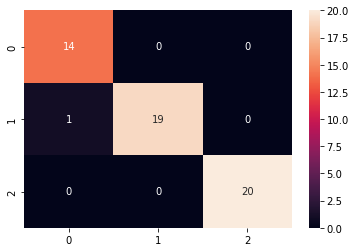

In [10]:
import seaborn as sns
sns.heatmap(k,annot=True)

In [16]:
from sklearn.svm import SVC
model2=SVC(kernel='poly')
model2.fit(X_train,y_train)
results2=model2.predict(X_test)

In [17]:
model2.score(X_test,y_test)
model1.score(X_test,y_test)

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


0.25925925925925924

model2.confusion_matrix(y_test,results)

In [18]:
k2=confusion_matrix(y_test,results2)
k2

array([[12,  2,  0],
       [ 2, 18,  0],
       [ 1, 19,  0]], dtype=int64)

<AxesSubplot:>

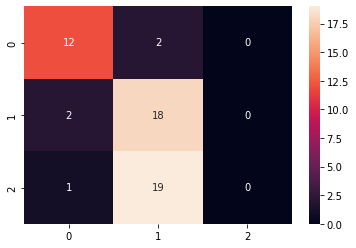

In [19]:
sns.heatmap(k2,annot=True)

In [20]:
from sklearn.tree import DecisionTreeClassifier
model3=DecisionTreeClassifier(criterion='entropy',random_state=100,min_samples_leaf=3,max_depth=3)
model3.fit(X_train1,y_train)
model3.predict(X_test)

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])

In [21]:
model3.score(X_test,y_test)

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


0.25925925925925924

In [22]:
print(model1.score(X_test,y_test),model2.score(X_test,y_test),model3.score(X_test,y_test))

0.25925925925925924 0.5555555555555556 0.25925925925925924


C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [24]:
from sklearn.ensemble import RandomForestClassifier
model4=RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
model4.fit(X_train,y_train)
model4.predict(X_test)


array([1., 2., 1., 1., 2., 2., 1., 2., 2., 0., 2., 2., 2., 2., 0., 0., 1.,
       1., 2., 1., 2., 2., 2., 0., 0., 1., 0., 0., 2., 1., 2., 0., 1., 0.,
       2., 0., 2., 2., 1., 0., 2., 1., 1., 1., 1., 0., 2., 1., 2., 1., 2.,
       2., 0., 1.])

In [25]:
model4.score(X_test,y_test)

0.9259259259259259

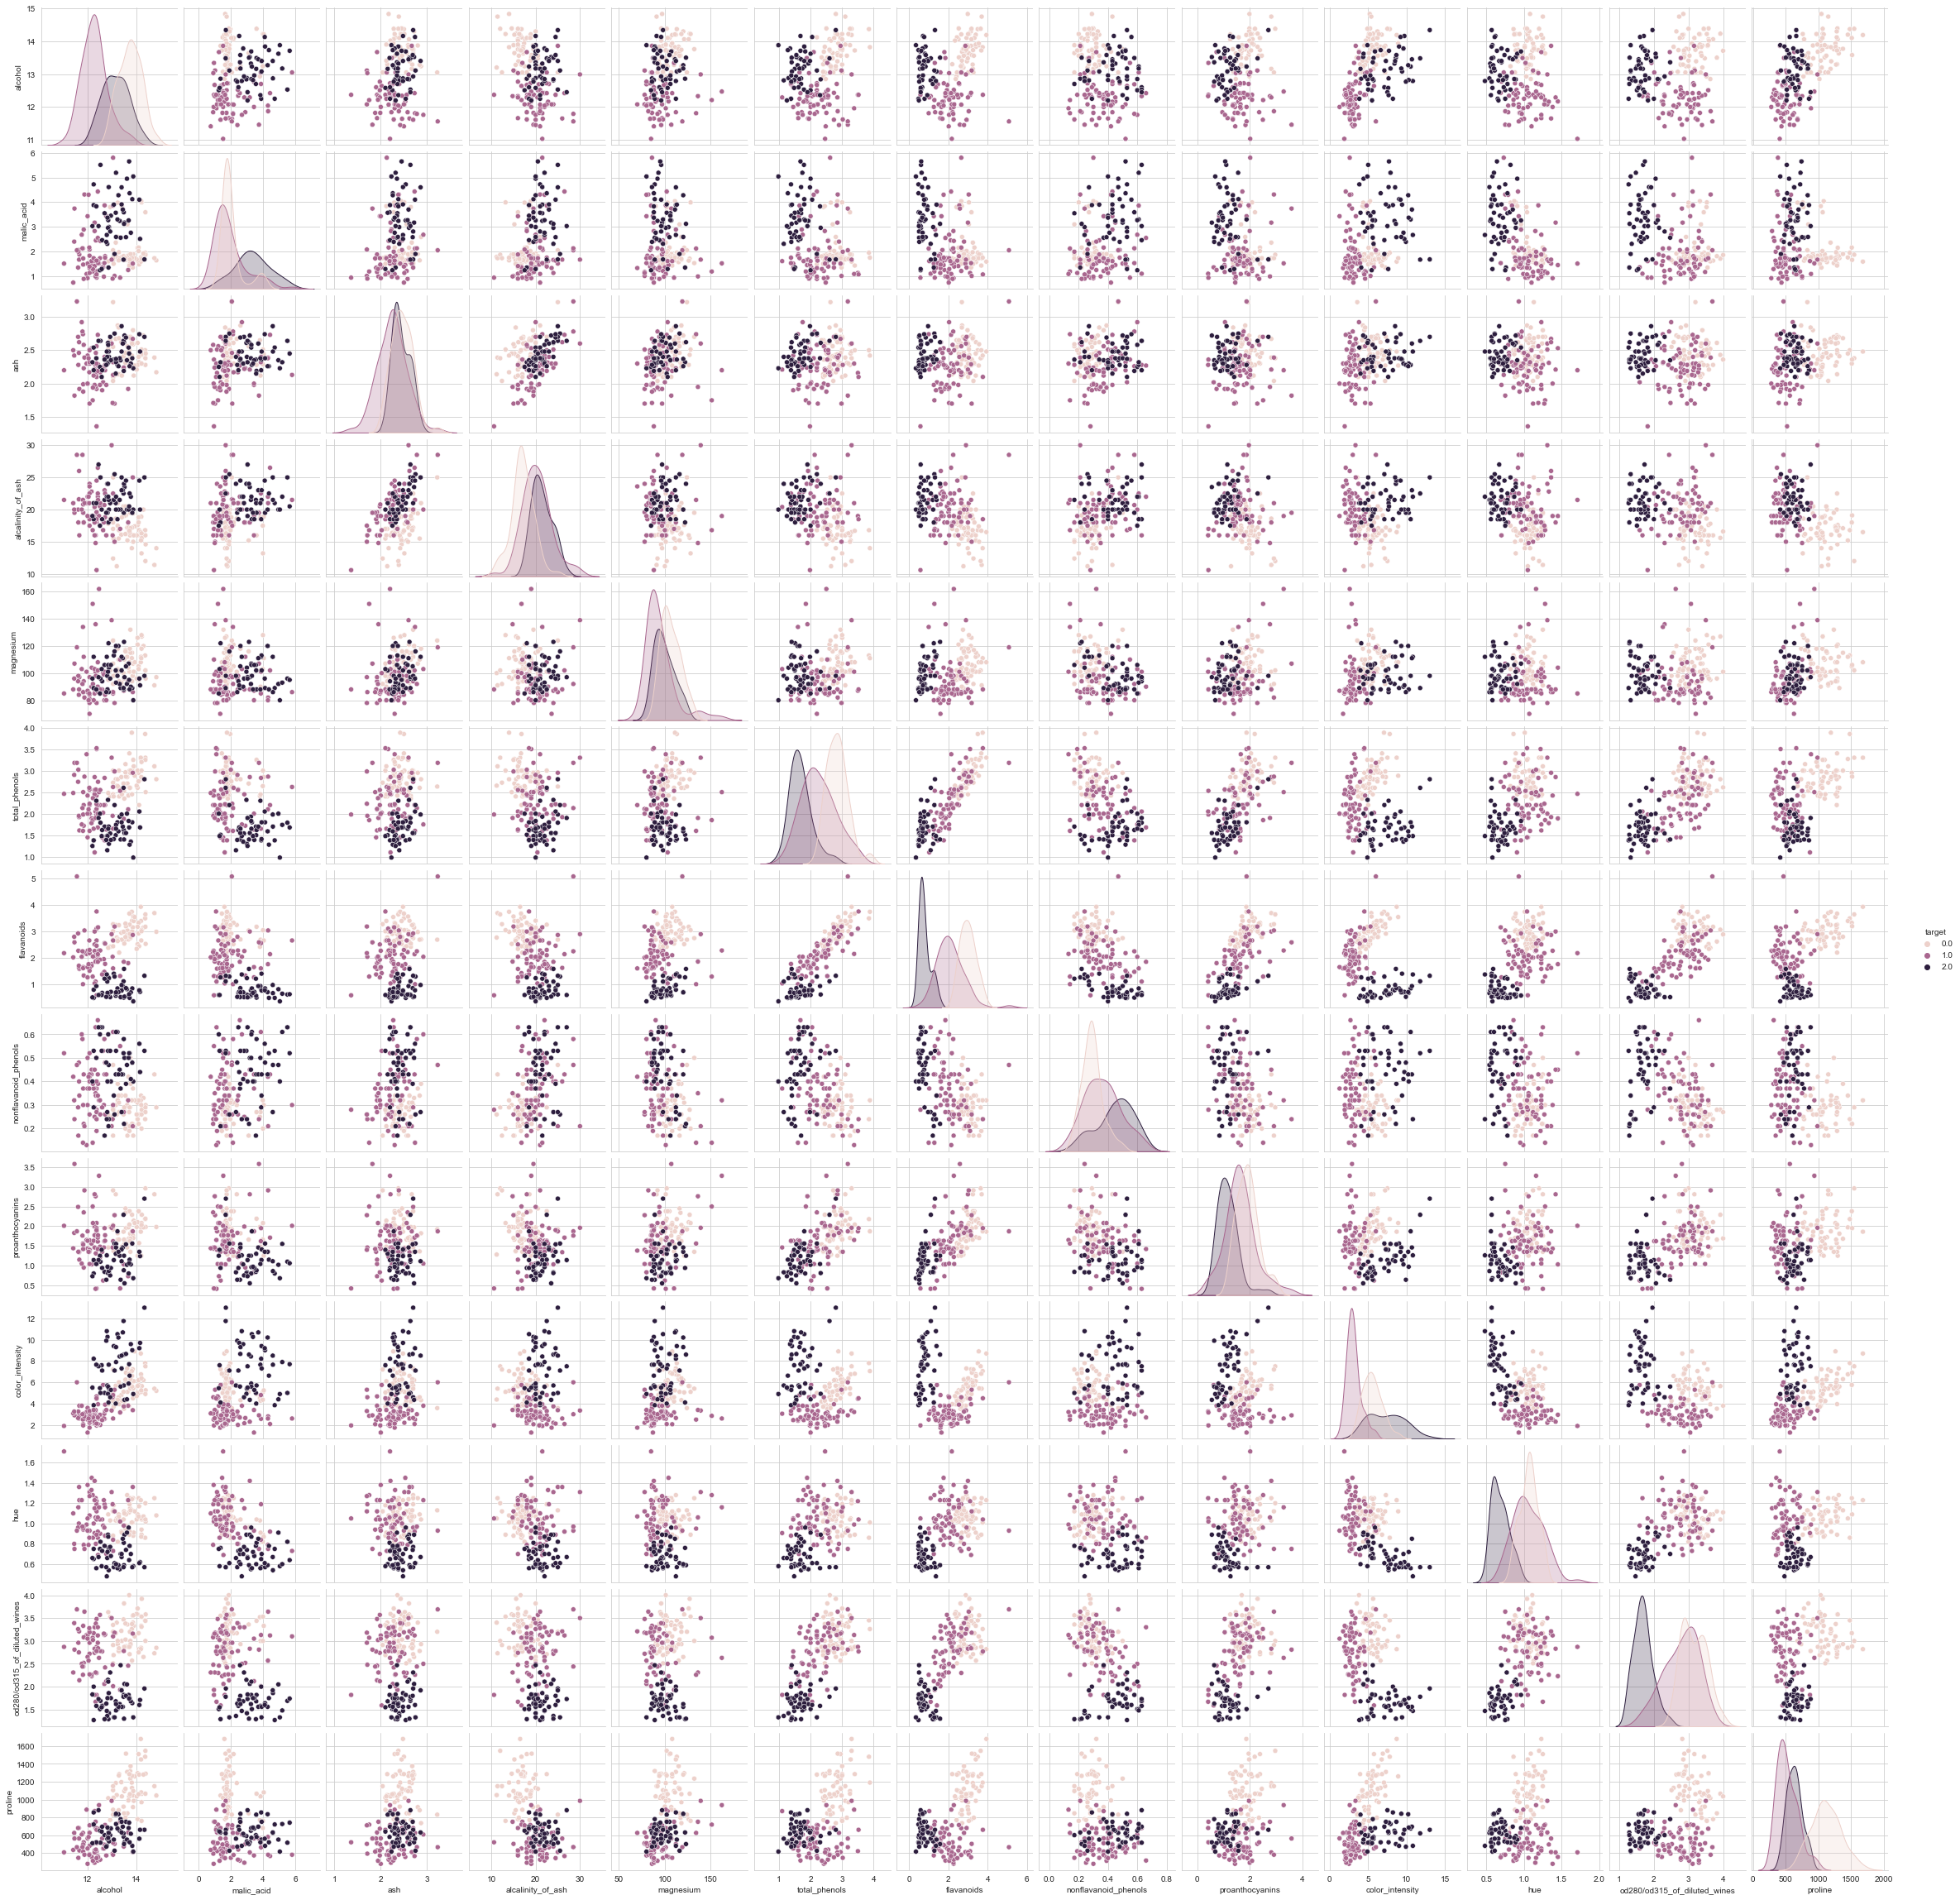

In [28]:
sns.set_style('whitegrid')
sns.pairplot(df_wine, hue='target')


In [37]:
from sklearn.cluster import KMeans
Model5=KMeans(n_clusters=3)
Model5.fit(X_train,y_train)
Model5.predict(X_test)

array([1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 0, 1, 2, 2, 1, 1, 2,
       2, 0, 0, 1, 0, 0, 2, 1, 2, 0, 1, 0, 1, 2, 2, 1, 1, 0, 2, 2, 2, 2,
       2, 2, 1, 2, 2, 2, 2, 2, 0, 1])

In [38]:
Model5.score(X_test,y_test)

-571356.6716767233